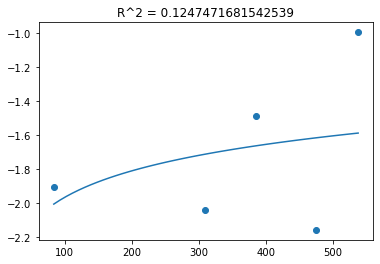

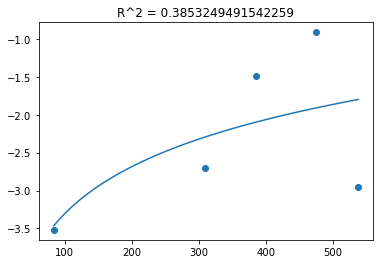

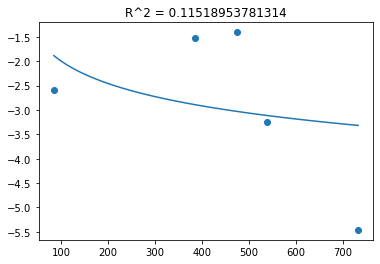

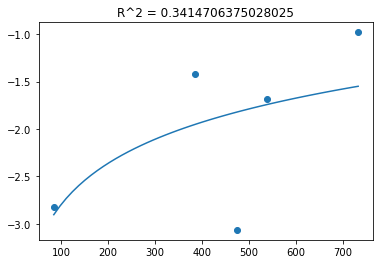

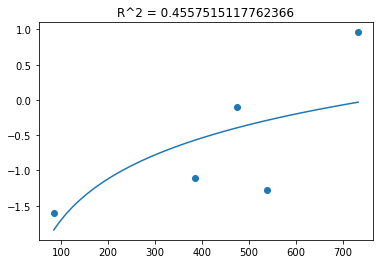

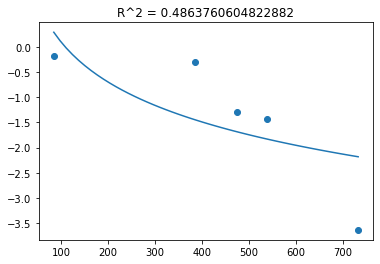

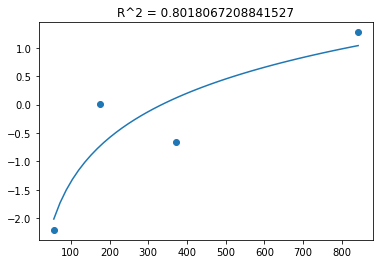

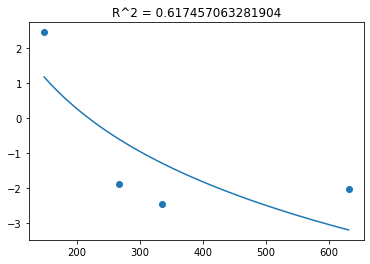

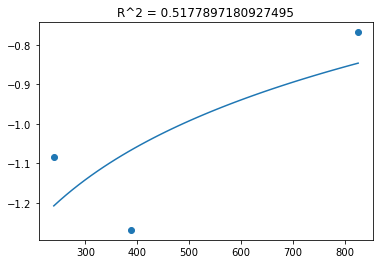

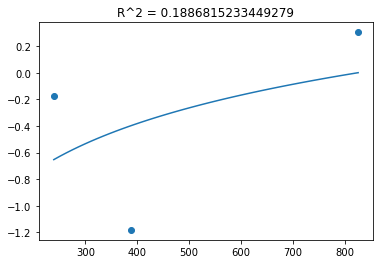

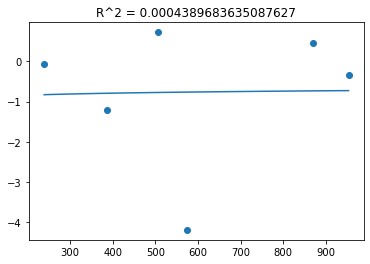

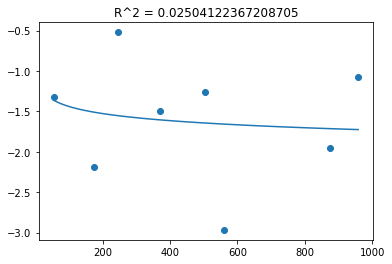

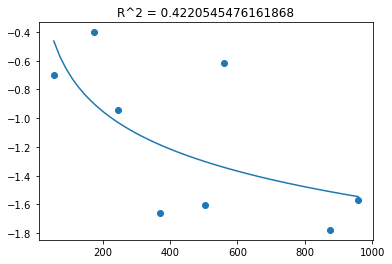

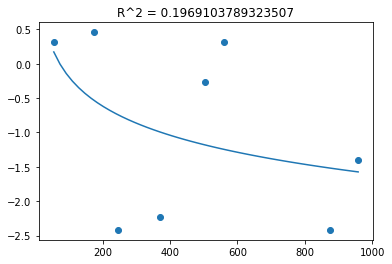

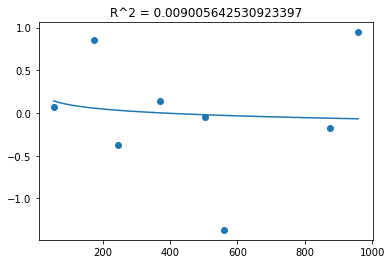

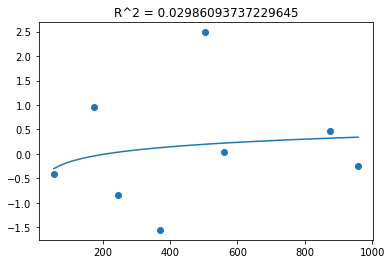

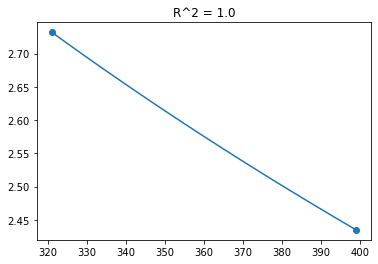

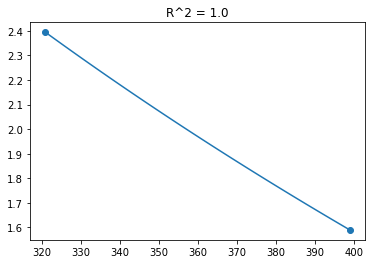

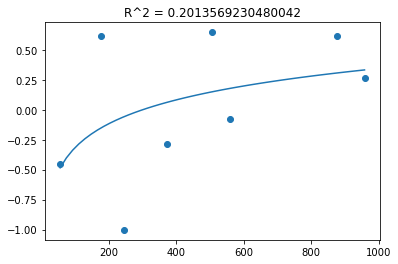

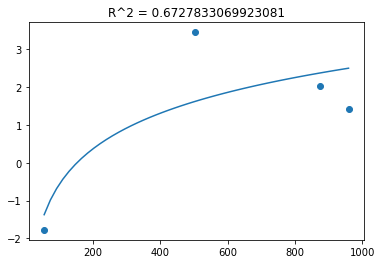

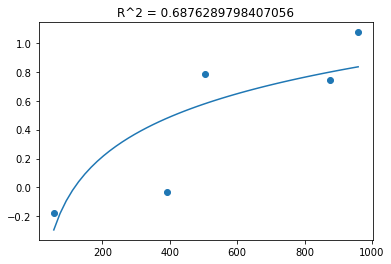

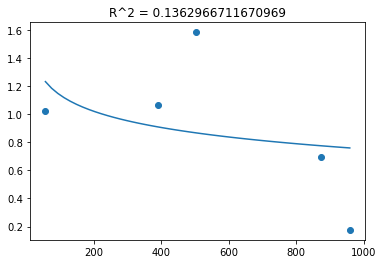

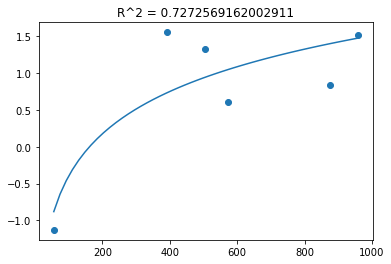

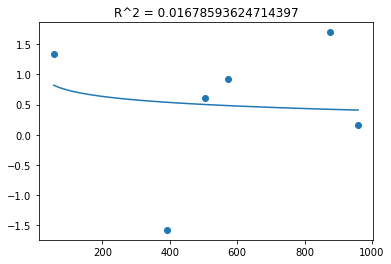

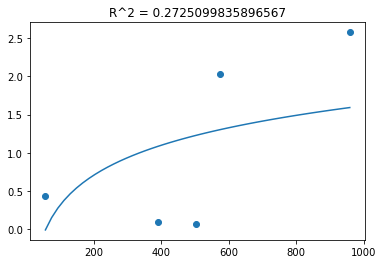

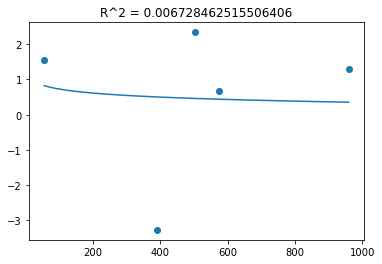

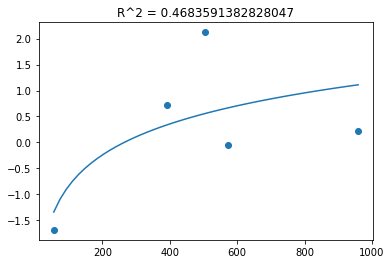

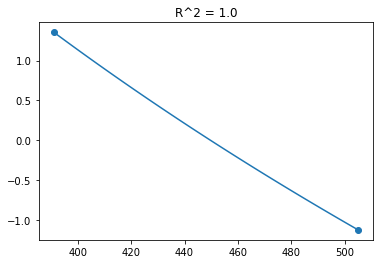

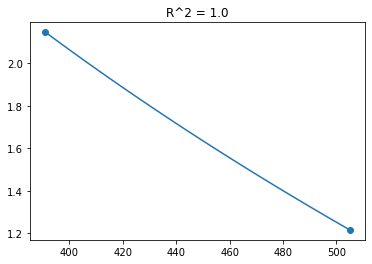

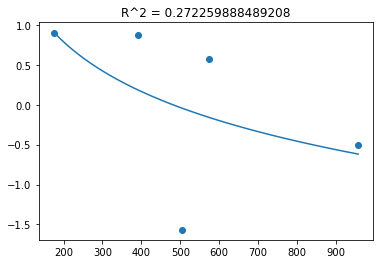

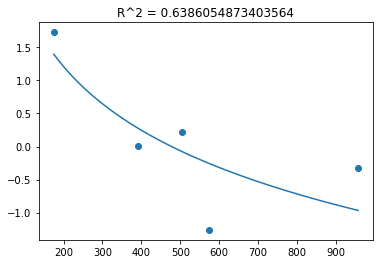

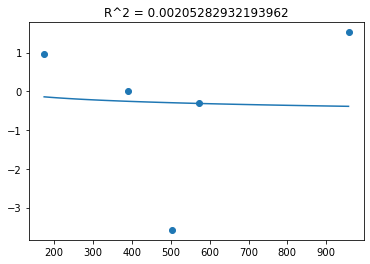

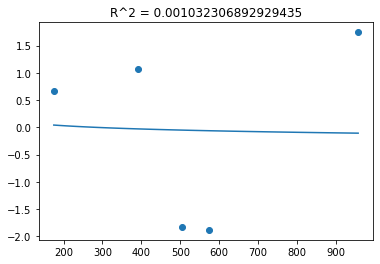

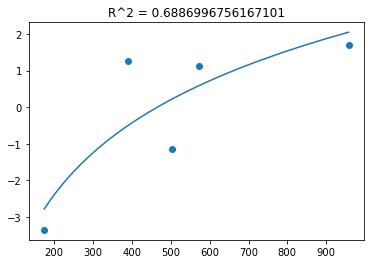

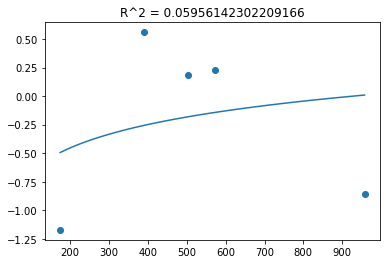

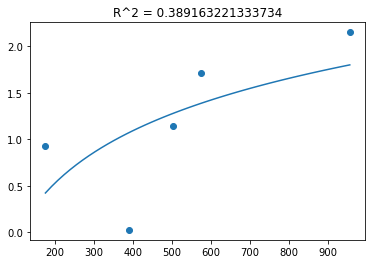

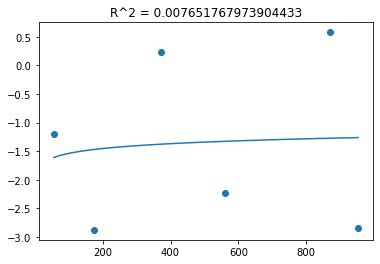

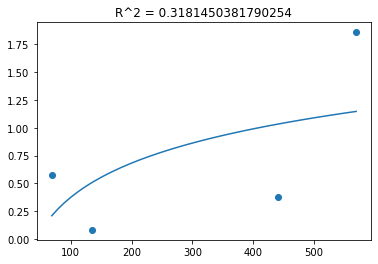

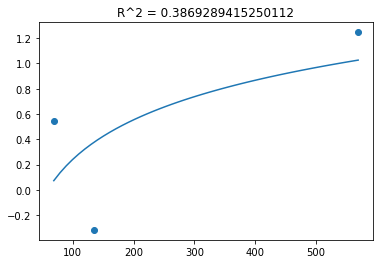

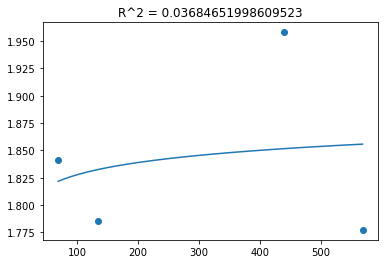

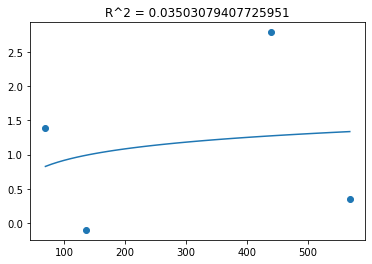

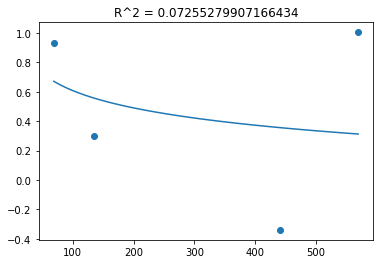

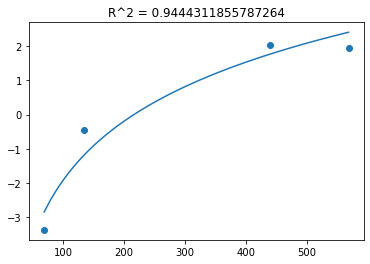

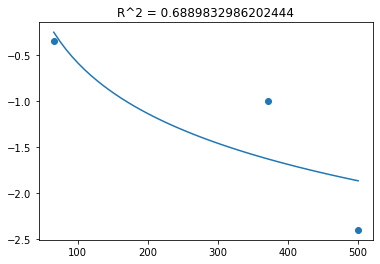

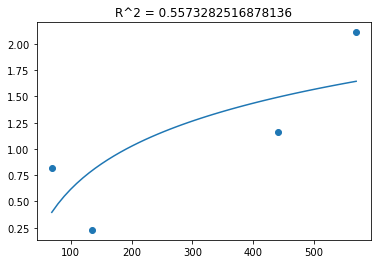

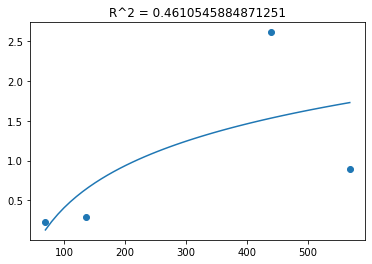

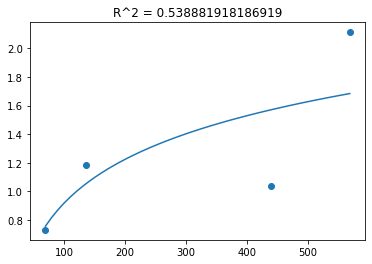

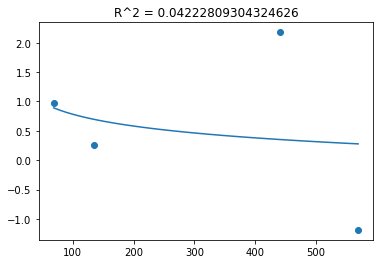

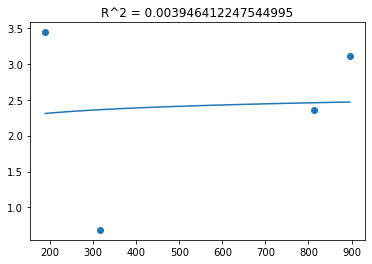

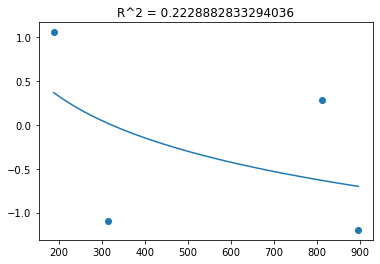

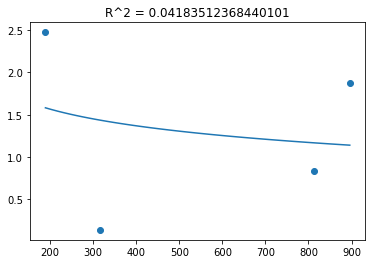

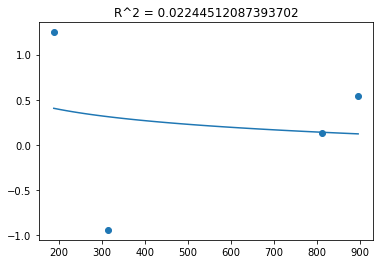

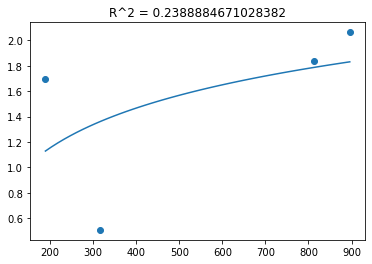

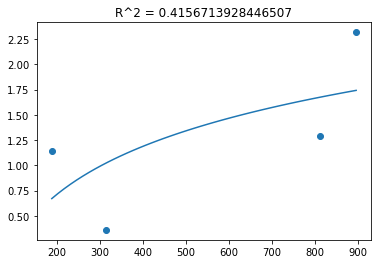

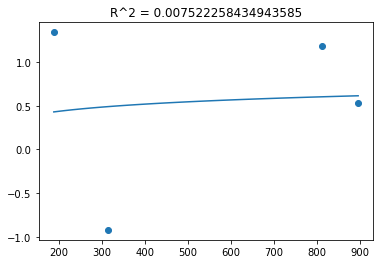

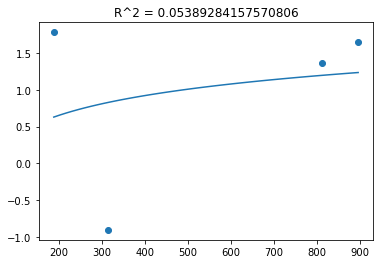

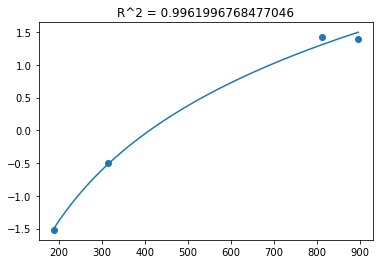

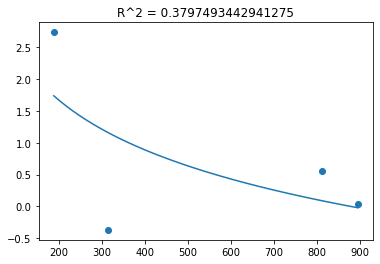

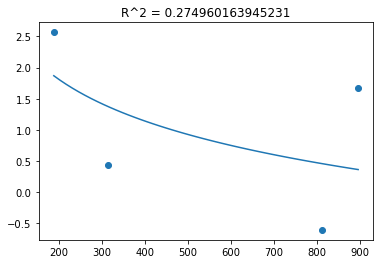

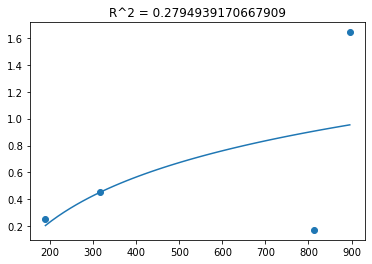

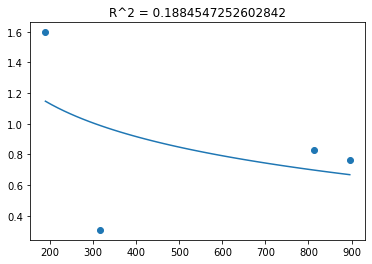

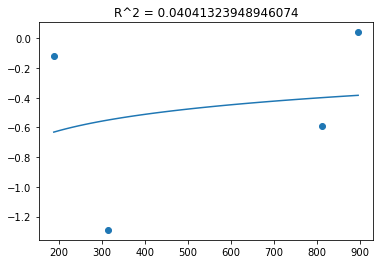

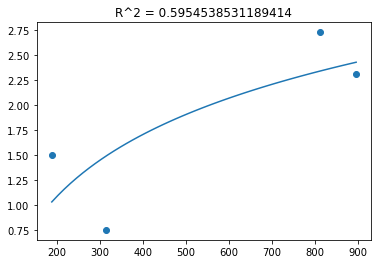

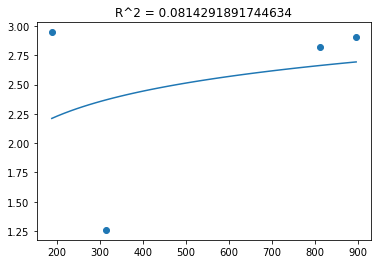

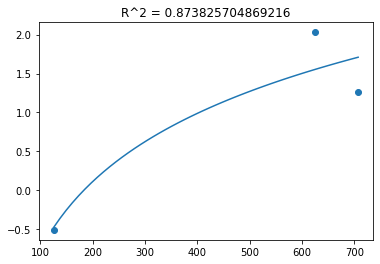

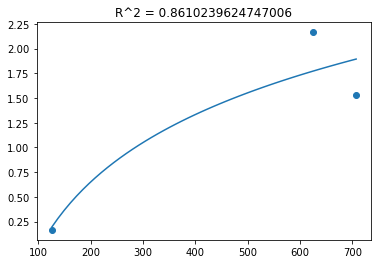

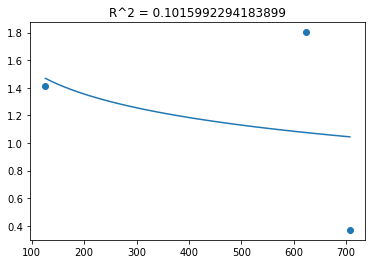

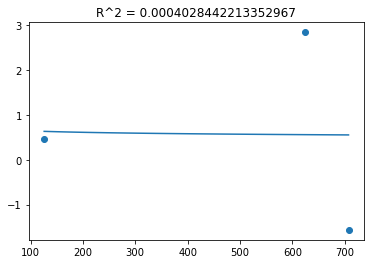

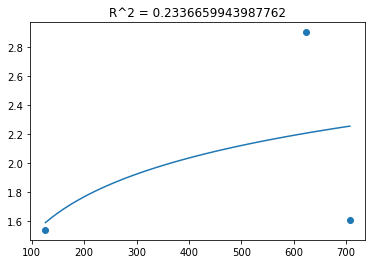

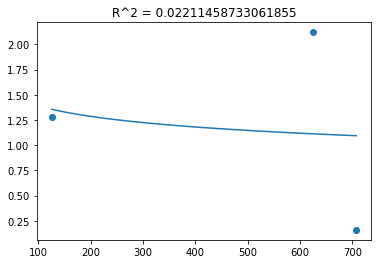

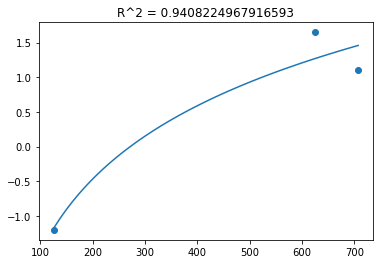

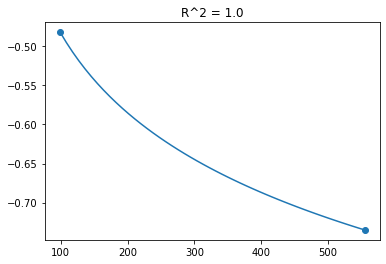

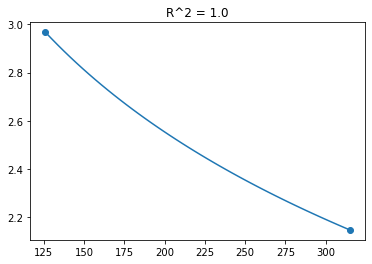

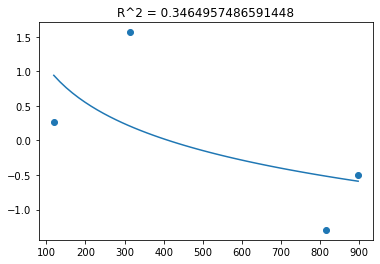

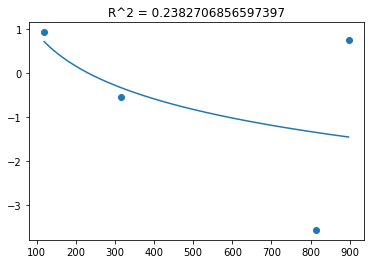

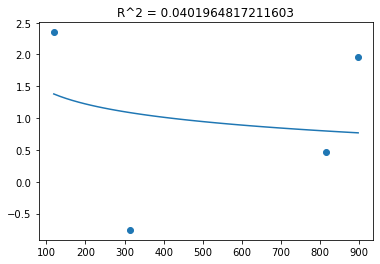

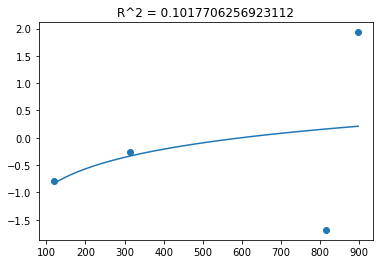

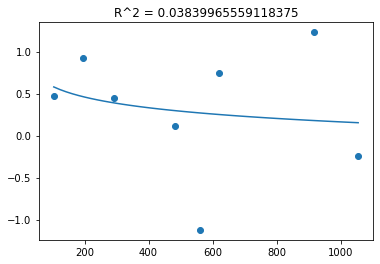

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

file_name = "Modelo Predictivo.xlsx"
archivo = pd.read_excel(file_name, sheet_name = "Factores_ajuste")

rights = archivo.dropna()

codigos = rights["Código"]

archivo_vals = pd.read_excel(file_name, sheet_name = "Cálculos")

contador = 0
for cod in codigos:
    y = list(archivo_vals.query(f"codigo == '{cod}'")["TQI_y"])[1:]
    x_ = list(archivo_vals.query(f"codigo == '{cod}'")["Fecha Inspección"].diff())[1:]
    y = np.log(np.array(y))
    x = []
    for i in x_:
        x.append(i.days)
    for pos in range(len(x)):
        if pos != 0:
            x[pos] += x[pos-1]
    contador += 1
    alfa = rights.query(f"Código == '{cod}'")["Alfa"].values[0]
    g = rights.query(f"Código == '{cod}'")["G"].values[0]
    r_2 = rights.query(f"Código == '{cod}'")["R^2"].values[0]
    X = np.linspace(max(x), min(x), 50)
    
    f = lambda t: np.log(g) + alfa*np.log(t)
    
    Y = f(X)
    plt.plot(X,Y)
    plt.scatter(x,y)
    plt.title(f"R^2 = {r_2}")
    plt.show()